<h2>Importe</h2>

In [32]:
import pickle
import pandas as pd
import numpy as np
import os
import src.data as data
import torch
import os
from sklearn import metrics
import matplotlib.pyplot as plt
import math


<h2>Methoden</h2>

In [25]:
#Straight up stolen from main.py
def calc_roc_auc(gts, probs):
    try:
        auc = metrics.roc_auc_score(gts, probs)
        if np.isnan(auc):
            auc = 0
            return auc
    except:
        return 0


In [39]:
def map_value(value):
    if value >= 0.5:
        return 1
    else:
        return 0

<h2>Laden der gespeicherten Daten und der Modelle</h2>

In [8]:
data_list = []
with open(r"C:\Users\ReneJ\Desktop\UnityStuff\patway-net\data_plot\test_data", "rb") as input:
    while True:
        try:
            x = pickle.load(input)
        except EOFError:
            break
        data_list.append(x)



In [9]:
len(data_list)

5

In [10]:
model_list = []
dir = r"C:\Users\ReneJ\Desktop\UnityStuff\patway-net\model"
for file in os.listdir(dir):
    filename = os.fsdecode(file)
    if "_15" in filename:
        model_list.append(torch.load(dir + "\\" + file))


In [59]:
len(model_list)

5

In [12]:
lowest_len = math.inf
for ds in data_list:
    if len(ds["x_test_seq"]) < lowest_len:
        lowest_len = len(ds["x_test_seq"])


In [34]:
lowest_len

183

In [56]:
data_list[4]["label"]
(data_list[4]["x_test_seq"])

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [61]:
x_axis = range(0,lowest_len -1)
y_values = []

n = 0
for model, dataset in zip(model_list,data_list):
    values = {"fold" : dataset["fold"], "data" : []}
    print(n)
    n += 1
    for i in range(0, lowest_len -1): #it's irrelevant which length I use since len(x_test_seq) should be equivalent to len(x_test_stat) and len(label)
        model.eval()
        with torch.no_grad():
            prediction = torch.sigmoid(model(torch.from_numpy(dataset["x_test_seq"]), torch.from_numpy(dataset["x_test_stat"])))
        values["data"].append(calc_roc_auc(dataset["label"][i],prediction))
    y_values.append(values)


0
1
2
3
4


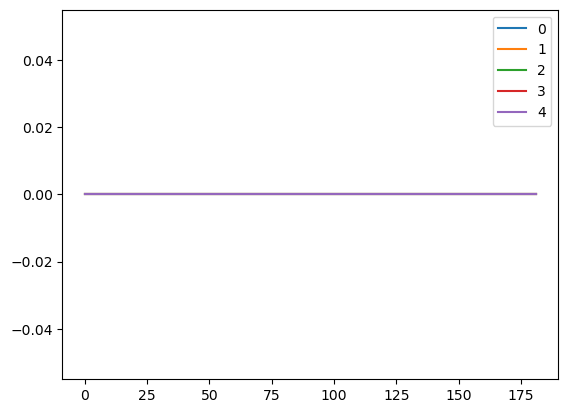

In [62]:
for y in y_values:
    plt.plot(x_axis, y["data"], label = y["fold"])

plt.legend()
plt.show()